In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.18.5
1.1.3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
0.23.2


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [9]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [10]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.001, kernel='linear')

In [11]:
clf.predict([[6, 2]])

array([2], dtype=int64)

In [12]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

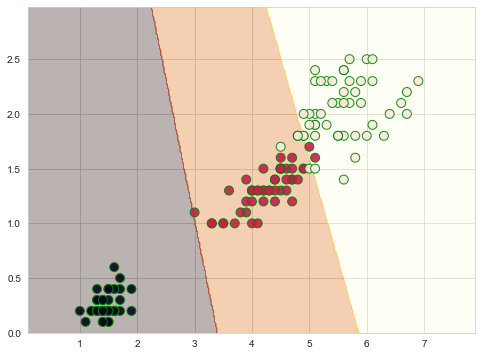

In [13]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [14]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

In [15]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [16]:
C = 1.0 #0.01
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='linear')

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [19]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [20]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [21]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [22]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


In [23]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [25]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


In [26]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)

SVC(gamma='auto', kernel='poly')

In [27]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

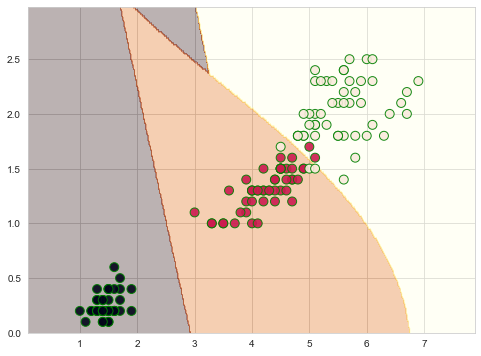

In [28]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [29]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

In [30]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [31]:
C = 1.0 #0.01
clf = svm.SVC(kernel='poly', degree=10, C=C, gamma='auto') #5
clf.fit(X_std_train, y_train)

SVC(degree=10, gamma='auto', kernel='poly')

In [32]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.7833
Accuracy SD: 		 0.1404


In [33]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [34]:
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  4],
       [ 0, 37,  0],
       [ 7, 18, 19]], dtype=int64)

In [35]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.7812
Recall Score: 		 0.7583
F1 Score: 		 0.7368


In [36]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [37]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  1],
       [ 0, 13,  0],
       [ 3,  3,  0]], dtype=int64)

In [38]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.6341
Recall Score: 		 0.7667
F1 Score: 		 0.6941


In [39]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length' , 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 1,
                 'versicolor' :1,
                 'virginica': 2}

df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train , X_test , y_train ,y_test = train_test_split(X,y,train_size=0.8,random_state =0)


In [40]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [41]:
C = 1.0
clf = svm.SVC(kernel ='rbf' , gamma=0.7, C=C)
clf.fit(X_std_train , y_train)

SVC(gamma=0.7)

In [42]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t{0:.4f}".format(np.mean(res)))
print("Average SD: \t\t {0:.4f}".format(np.std(res)))



Average Accuracy: 	0.9500
Average SD: 		 0.0553


In [43]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [44]:
confusion_matrix(y_train, y_train_pred)

array([[73,  3],
       [ 3, 41]], dtype=int64)

In [45]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


In [46]:
from sklearn.pipeline import Pipeline 

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV 

In [48]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [49]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [50]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')

In [51]:
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    3.5s finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [52]:
svm_grid_rbf.best_score_

0.9583333333333334

In [53]:
best = svm_grid_rbf.best_estimator_.get_params()

In [54]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.10
	clf__gamma: 	 0.25


In [55]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [56]:
confusion_matrix(y_test, y_test_pred)

array([[24,  0],
       [ 0,  6]], dtype=int64)

In [57]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


In [58]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

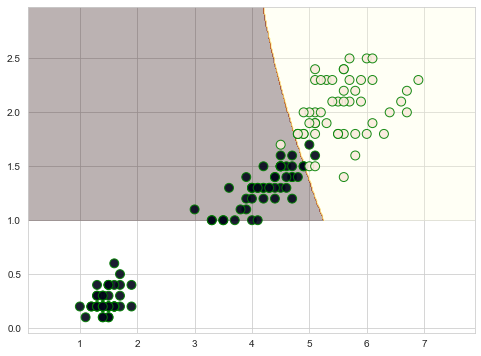

In [59]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');